# 1D LinBin

In [1]:
%pylab inline
from statsmodels.kernel_methods import fast_linbin
from statsmodels.kernel_methods.kde_utils import Grid
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
N=int(1e6)
nbins = 128
dist = stats.norm(0, 1)
pts = dist.rvs(N)
#ws = 3*rand(N)
ws = 1.
total_weight = N
low = np.floor(pts.min())
up = np.ceil(pts.max())
print(low, up)
pts.shape

-5.0 5.0


(1000000,)

In [3]:
mesh, bins = fast_linbin.fast_linbin(pts, r_[low, up], nbins, weights=ws, bin_type='C')
print(bins.shape)
normed_bins = bins / (total_weight * mesh.bin_sizes()[0])
print("Sum: ", sum(bins), " -- total_weight: ", total_weight)

(128,)
Sum:  1000000.0  -- total_weight:  1000000


In [4]:
H, edges = np.histogram(pts, nbins, range=(low, up), density=True)
h = (edges[1:] + edges[:-1])/2

In [5]:
f_mesh = mesh.full()
expected_linbin = dist.pdf(f_mesh)
err_linbin = (normed_bins - expected_linbin)
print(expected_linbin.shape)

expected_hist = dist.pdf(h)
err_H = (H - expected_hist)
print(expected_hist.shape)

(128,)
(128,)


Text(0.5, 1.0, 'Binning Error')

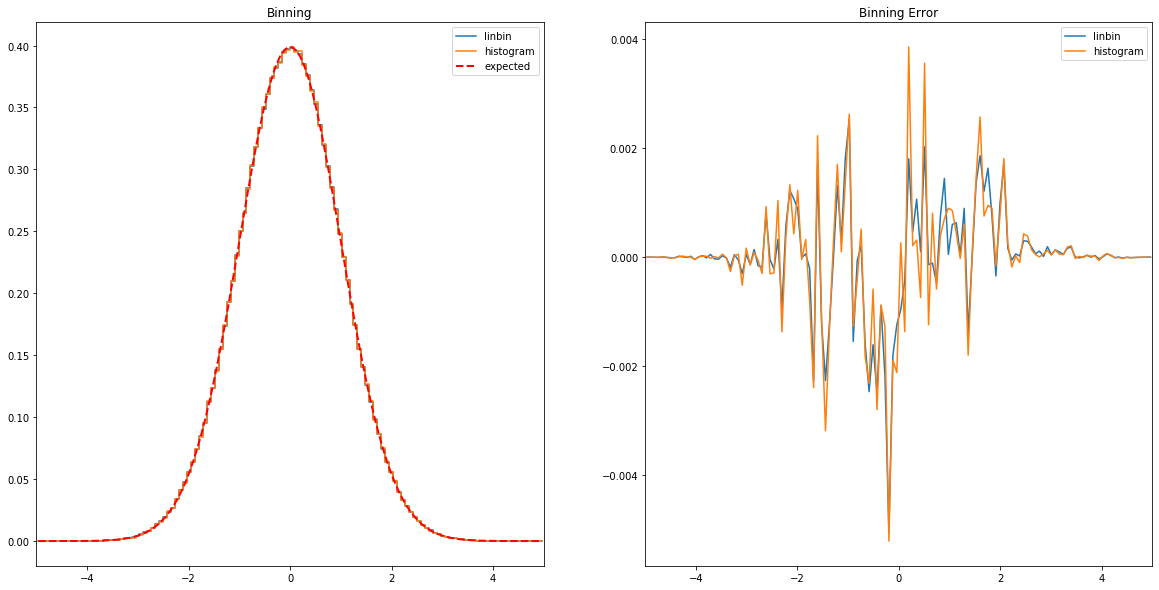

In [6]:
f = figure()
f.set_size_inches(20,10)
ax1 = f.add_subplot(1,2,1)
plot(f_mesh, normed_bins, label='linbin', linestyle='-', drawstyle='steps-mid')
plot(h, H, label='histogram', linestyle='-', drawstyle='steps-mid')
plot(f_mesh, expected_linbin, label='expected', color='red', linestyle='--', linewidth=2)
xlim(low, up)
legend(loc='best')
title('Binning')

ax2 = f.add_subplot(1,2,2)
err_linbins = normed_bins - expected_linbin
plot(f_mesh, err_linbins, label='linbin')
err_H = H - expected_hist
plot(h, err_H, label='histogram')
xlim(low, up)
legend(loc='best')
title('Binning Error')


### Evaluation

In [7]:
print("Error linbin = ", sqrt(sum((err_linbin)**2)))
print("Error hist = ", sqrt(sum((err_H)**2)))

Error linbin =  0.01095245760165095
Error hist =  0.012457151433003359


In [11]:
ppts = dist.rvs(int(1e6))
print('Fast linbin')
print('-----------')
%timeit fast_linbin.fast_linbin(ppts, [low, up], 2**16, weights=ws)
print('\nHistogram')
print('---------')
%timeit np.histogram(ppts, 2**16, range=(low, up))

Fast linbin
-----------
12 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Histogram
---------
13.9 ms ± 95 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Cyclic and Reflexive binning

In [13]:
ref_mesh, ref_bins = fast_linbin.fast_linbin(pts, [low, 0], nbins, weights=ws, bin_type='R')
dx = ref_mesh.start_interval[0]
ref_bins /= total_weight*dx
print('Sum ref: ', dx*sum(ref_bins))
ref_bins.max(), ref_bins.argmax(), ref_bins.shape

Sum ref:  1.0


(0.7963763141183927, 127, (128,))

In [14]:
cyc_mesh, cyc_bins = fast_linbin.fast_linbin(pts, [low, 0], nbins, weights=ws, bin_type='C')
cyc_bins /= total_weight*dx
print('Sum cyc: ', dx*sum(cyc_bins))

Sum cyc:  0.9999999999999999


Text(0.5, 1.0, 'Binning')

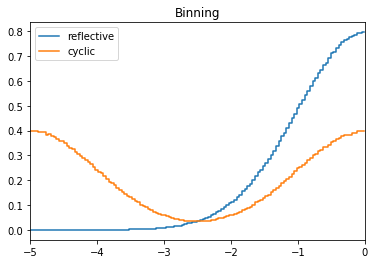

In [15]:
f = figure()
plot(ref_mesh.full(), ref_bins, label='reflective', linestyle='-', drawstyle='steps-mid')
plot(cyc_mesh.full(), cyc_bins, label='cyclic', linestyle='-', drawstyle='steps-mid')
xlim(low, 0)
legend(loc='best')
title('Binning')

In [16]:
ref_mesh, ref_bins = fast_linbin.fast_linbin(pts, [0, up], nbins, weights=ws, bin_type='R')
dx = ref_mesh.start_interval[0]
ref_bins /= total_weight*dx
print('Sum ref: ', dx*sum(ref_bins))
ref_bins.max(), ref_bins.argmax(), ref_bins.shape

Sum ref:  1.0


(0.7963763141183933, 0, (128,))

In [17]:
cyc_mesh, cyc_bins = fast_linbin.fast_linbin(pts, [0, up], nbins, weights=ws, bin_type='C')
cyc_bins /= total_weight*dx
print('Sum cyc: ', dx*sum(cyc_bins))

Sum cyc:  1.0


Text(0.5, 1.0, 'Binning')

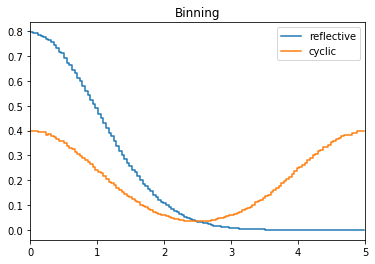

In [18]:
f = figure()
plot(ref_mesh.full(), ref_bins, label='reflective', linestyle='-', drawstyle='steps-mid')
plot(cyc_mesh.full(), cyc_bins, label='cyclic', linestyle='-', drawstyle='steps-mid')
xlim(0, up)
legend(loc='best')
title('Binning')

# 2D LinBin

In [20]:
%pylab inline
from statsmodels.kernel_methods import fast_linbin
from statsmodels.kernel_methods.kde_utils import Grid
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [21]:
N=int(1e7)
dist_x = stats.norm(0, 1)
dist_y = stats.norm(0, 2)
pts = c_[dist_x.rvs(N), dist_y.rvs(N)]
#ws = 3*rand(N)
ws = 1.
total_weight = N
low = np.floor(pts.min(axis=0))
up = np.ceil(pts.max(axis=0))
print(low, up)
pts.shape

[ -6. -11.] [ 6. 11.]


(10000000, 2)

In [24]:
mesh, bins = fast_linbin.fast_linbin_nd(pts, c_[low, up], [128,256], weights=ws, bin_type='C')
print('Shape: ', mesh.shape)
print('Bounds: ', mesh.bounds)
print('Start Interval: ', mesh.start_interval)
print(mesh[0,:5], mesh[1,:5])

Shape:  (128, 256)
Bounds:  [[ -6.   6.]
 [-11.  11.]]
Start Interval:  [0.09375   0.0859375]
[-5.953125 -5.859375 -5.765625 -5.671875 -5.578125] [-10.95703125 -10.87109375 -10.78515625 -10.69921875 -10.61328125]


In [25]:
mesh2 = mesh.full('C')
print(mesh2.shape, bins.shape)
dm = mesh.start_interval
print(dm)
da = mesh.start_volume
normed_bins = bins / (total_weight*da)

(2, 128, 256) (128, 256)
[0.09375   0.0859375]


In [26]:
sum(bins), total_weight

(10000000.0, 10000000)

In [27]:
hws = ws if ws is 1. else None
H, xedges, yedges = histogram2d(pts[:,0], pts[:,1], normed=True, weights=hws, bins=[128,256], range=c_[low, up])
xh = (xedges[1:] + xedges[:-1])/2
yh = (yedges[1:] + yedges[:-1])/2

In [28]:
expected_linbin = dist_x.pdf(mesh2[0]) * dist_y.pdf(mesh2[1][:])
err_linbin = (normed_bins - expected_linbin)
print(expected_linbin.shape)

expected_hist = dist_x.pdf(xh) * dist_y.pdf(yh)[:,None]
err_H = (H.T - expected_hist)
print(expected_hist.shape)

(128, 256)
(256, 128)


Text(0.5, 1.0, "Error Numpy's Histogram")

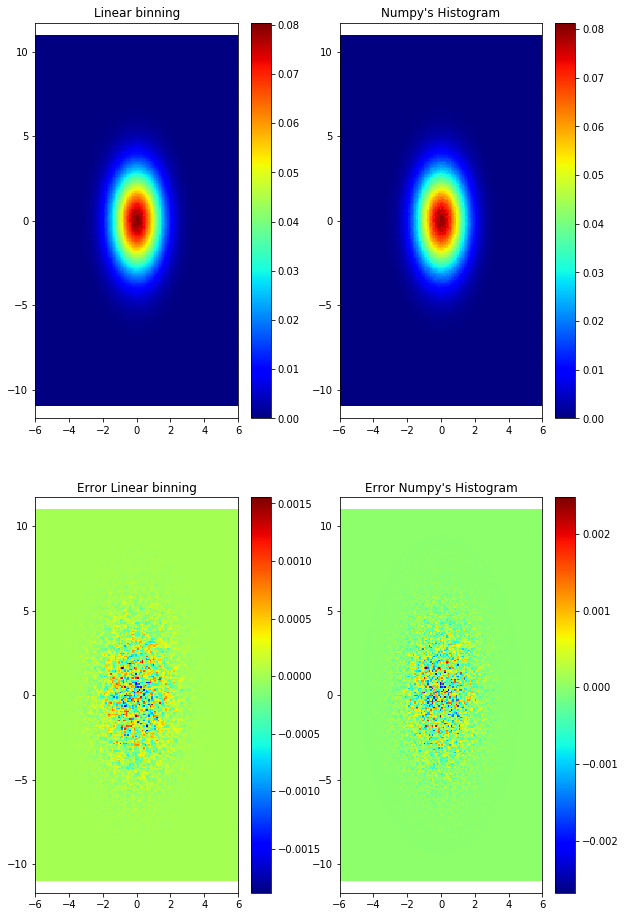

In [29]:
f = figure()
f.set_size_inches(10,16)
ax1 = f.add_subplot(2,2,1)
pcolormesh(mesh2[0], mesh2[1], normed_bins, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(low[0], up[0])
ylim(low[1], up[1])
title('Linear binning')

ax2 = f.add_subplot(2,2,2)
pcolormesh(xh, yh, H.T, cmap=cm.jet, shading='flat')
axis('equal')
xlim(low[0], up[0])
ylim(low[1], up[1])
colorbar()
title("Numpy's Histogram")

ax1 = f.add_subplot(2,2,3)
pcolormesh(mesh2[0], mesh2[1], err_linbin, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(low[0], up[0])
ylim(low[1], up[1])
title('Error Linear binning')

ax2 = f.add_subplot(2,2,4)
xh = (xedges[1:] + xedges[:-1])/2
yh = (yedges[1:] + yedges[:-1])/2
pcolormesh(xh, yh, err_H, cmap=cm.jet, shading='flat')
axis('equal')
xlim(low[0], up[0])
ylim(low[1], up[1])
colorbar()
title("Error Numpy's Histogram")


In [32]:
# Force using the generic nd version
%timeit fast_linbin._fast_bin_nd(fast_linbin._cy_fast_linbin.fast_linbin_nd, pts, c_[low, up], [512, 512], ws, 'B', None)

376 ms ± 8.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit fast_linbin.fast_linbin_nd(pts, c_[low, up], [512, 512], weights=ws)

330 ms ± 5.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit fast_linbin.fast_bin_nd(pts, c_[low, up], [512, 512], weights=ws)

201 ms ± 8.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%timeit H, xedges, yedges = histogram2d(pts[:,0], pts[:,1], weights=hws, normed=True, bins=[512, 512], range=[[low[0], up[0]], [low[1], up[1]]])

1.07 s ± 8.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Evaluation of the binning

And we can see the linear binning is a better approximation of the density:

In [37]:
print("Error linbin = ", sqrt(sum((err_linbin)**2)))
print("Error hist = ", sqrt(sum((err_H)**2)))

Error linbin =  0.026064490078128215
Error hist =  0.038915456545051824


In [39]:
try:
    bins, mesh = fast_linbin.fast_linbin_nd(pts.T, c_[low, up], 128, weights=ws)
    assert False, "There should have been an error"
except ValueError as err:
    print("Expected ValueError: ", err)

Expected ValueError:  Error, you cannot have more than 64 dimensions, and you have 10000000


### Test Bounded Bins

In [41]:
%time ref_mesh, ref_bins = fast_linbin.fast_linbin_nd(pts, c_[low, [0,0]], [512, 512], weights=ws, bin_type='R')
da = prod(ref_mesh.start_interval)
ref_bins /= total_weight*da
print("Sum ref: ", sum(ref_bins)*da)

CPU times: user 492 ms, sys: 24 ms, total: 516 ms
Wall time: 514 ms
Sum ref:  1.0


In [43]:
%time cyc_mesh, cyc_bins = fast_linbin.fast_linbin_nd(pts, c_[low, [0,0]], [512, 512], weights=ws, bin_type='C')
da = prod(cyc_mesh.start_interval)
cyc_bins /= total_weight*da
cyc_mesh = cyc_mesh.full('C')
print("Sum cyc: ", sum(cyc_bins)*da)

CPU times: user 491 ms, sys: 16.1 ms, total: 507 ms
Wall time: 505 ms
Sum cyc:  1.0


Text(0.5, 1.0, 'Cyclic Linear binning')

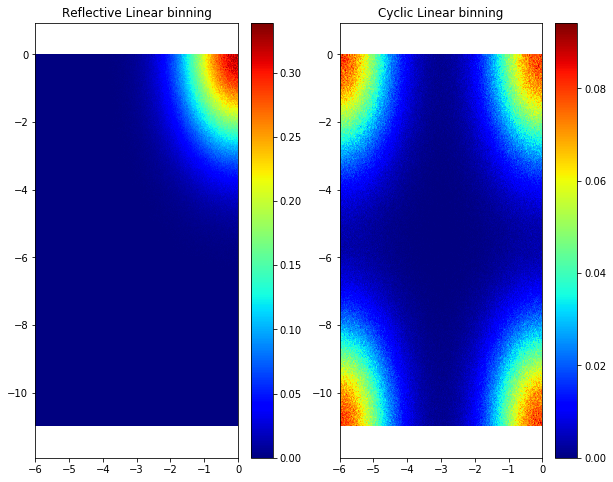

In [44]:
f = figure()
f.set_size_inches(10,8)
ax1 = f.add_subplot(1,2,1)
pcolormesh(ref_mesh[0], ref_mesh[1], ref_bins, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(low[0], 0)
ylim(low[1], 0)
title('Reflective Linear binning')

ax2 = f.add_subplot(1,2,2)
pcolormesh(cyc_mesh[0], cyc_mesh[1], cyc_bins, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(low[0], 0)
ylim(low[1], 0)
title("Cyclic Linear binning")

In [46]:
%time ref_mesh, ref_bins = fast_linbin.fast_linbin_nd(pts, c_[[0,0], up], [512, 512], weights=ws, bin_type='R')
da = ref_mesh.start_volume
ref_bins /= total_weight*da
print("Sum ref: ", sum(ref_bins)*da)

CPU times: user 490 ms, sys: 24 ms, total: 514 ms
Wall time: 511 ms
Sum ref:  0.9999999999999999


In [47]:
%time cyc_mesh, cyc_bins = fast_linbin.fast_linbin_nd(pts, c_[[0,0], up], [512, 512], weights=ws, bin_type='C')
da = cyc_mesh.start_volume
cyc_bins /= total_weight*da
cyc_mesh = cyc_mesh.full('C')
print("Sum cyc: ", sum(cyc_bins)*da)

CPU times: user 480 ms, sys: 31.6 ms, total: 512 ms
Wall time: 509 ms
Sum cyc:  1.0


Text(0.5, 1.0, 'Cyclic Linear binning')

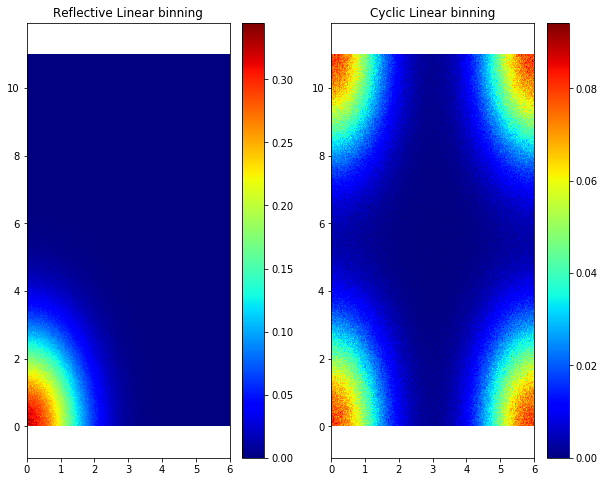

In [48]:
f = figure()
f.set_size_inches(10,8)
ax1 = f.add_subplot(1,2,1)
pcolormesh(ref_mesh[0], ref_mesh[1], ref_bins, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(0, up[0])
ylim(0, up[1])
title('Reflective Linear binning')

ax2 = f.add_subplot(1,2,2)
pcolormesh(cyc_mesh[0], cyc_mesh[1], cyc_bins, cmap=cm.jet, shading='flat')
axis('equal')
colorbar()
xlim(0, up[0])
ylim(0, up[1])
title("Cyclic Linear binning")

# 3D LinBin

In [50]:
%pylab inline
from statsmodels.kernel_methods import fast_linbin
from statsmodels.kernel_methods.kde_utils import Grid
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [51]:
N=int(1e6)
dist_x = stats.norm(0, 1)
dist_y = stats.norm(0, 2)
dist_z = stats.norm(0, 3)
pts = c_[dist_x.rvs(N), dist_y.rvs(N), dist_z.rvs(N)]
#ws = 3*rand(N)
ws = 1.
total_weight = N
low = np.floor(pts.min(axis=0))
up = np.ceil(pts.max(axis=0))
print(low, up)
pts.shape

[ -5. -11. -16.] [ 5. 11. 15.]


(1000000, 3)

In [53]:
# Force using the generic version
%timeit fast_linbin._fast_bin_nd(fast_linbin._cy_fast_linbin.fast_linbin_nd, pts, c_[low, up], [512, 512, 512], ws, 'B', None)

415 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%timeit fast_linbin.fast_linbin_nd(pts, c_[low, up], [512, 512, 512], weights=ws)

389 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
vnd = fast_linbin._fast_bin_nd(fast_linbin._cy_fast_linbin.fast_linbin_nd, pts, c_[low, up], [256,256,256], ws, 'B', None)
v3d = fast_linbin.fast_linbin_nd(pts, c_[low, up], [256,256,256], weights=ws)
sum((vnd[1] - v3d[1])**2)

0.0